In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import nuSQuIDS as nsq
import nuflux

matplotlib.rcParams.update({'font.size': 16})
matplotlib.rcParams.update({'lines.linewidth': 3})
matplotlib.rcParams.update({'patch.linewidth': 3})

ModuleNotFoundError: No module named 'nuSQuIDS'

In [3]:
!which python
import sys
!{sys.executable} -m 

/snap/jupyter/6/bin/python


In [3]:
# Define path to file (you may need to change this to match your system)
input_file = "neutrino_mc.csv"

# Load the file using pandas
input_data = pd.read_csv(input_file)

NameError: name 'pd' is not defined

In [4]:
units = nsq.Const()

NameError: name 'nsq' is not defined

In [5]:
def ()

interactions = False

E_min = 1.0*units.GeV
E_max = 1.0e3*units.PeV
E_nodes = 100
energy_nodes = nsq.logspace(E_min,E_max,E_nodes)

cth_min = -1.0
cth_max = 1.0
cth_nodes = 40
cth_nodes = nsq.linspace(cth_min,cth_max,cth_nodes)

neutrino_flavors = 3

nsq_atm = nsq.nuSQUIDSAtm(cth_nodes,energy_nodes,neutrino_flavors,nsq.NeutrinoType.both,interactions)

SyntaxError: invalid syntax (<ipython-input-5-75eb0787bb48>, line 1)

In [42]:
AtmInitialFlux = np.zeros((len(cth_nodes),len(energy_nodes),2,neutrino_flavors))
flux = nuflux.makeFlux('honda2006')
for ic,cth in enumerate(nsq_atm.GetCosthRange()):
    for ie,E in enumerate(nsq_atm.GetERange()):
        nu_energy = E/units.GeV
        nu_cos_zenith = cth
        AtmInitialFlux[ic][ie][0][0] = flux.getFlux(nuflux.NuE,nu_energy,nu_cos_zenith) # nue
        AtmInitialFlux[ic][ie][1][0] = flux.getFlux(nuflux.NuEBar,nu_energy,nu_cos_zenith) # nue bar
        AtmInitialFlux[ic][ie][0][1] = flux.getFlux(nuflux.NuMu,nu_energy,nu_cos_zenith) # numu
        AtmInitialFlux[ic][ie][1][1] = flux.getFlux(nuflux.NuMuBar,nu_energy,nu_cos_zenith) # numu bar
        AtmInitialFlux[ic][ie][0][2] = flux.getFlux(nuflux.NuTau,nu_energy,nu_cos_zenith) # nutau
        AtmInitialFlux[ic][ie][1][2] = flux.getFlux(nuflux.NuTauBar,nu_energy,nu_cos_zenith) # nutau bar

In [43]:
nsq_atm.Set_initial_state(AtmInitialFlux,nsq.Basis.flavor)
nsq_atm.Set_ProgressBar(True) # progress bar will be printed on terminal
nsq_atm.EvolveState()

In [75]:
lifetime = 5.0*365*24*60*60
meter_to_cm_sq = 1e4
rate_weight = np.zeros_like(input_data["weight"])
for i in range(len(rate_weight)):
    if input_data["pdg"][i] > 0 :
        neutype = 0
    else:
        neutype = 1
        
    if np.abs(input_data["pdg"][i]) == 12:
        neuflavor = 0
    elif np.abs(input_data["pdg"][i]) == 14:
        neuflavor = 1
    elif np.abs(input_data["pdg"][i]) == 16:
        neuflavor = 2
        
    if input_data["true_energy"][i]*units.GeV < E_min or input_data["true_energy"][i]*units.GeV > E_max:
        rate_weight[i] = 0
        continue
    rate_weight[i] = input_data["weight"][i]*nsq_atm.EvalFlavor(neuflavor,
                                                                np.cos(input_data["true_zenith"][i]),
                                                                input_data["true_energy"][i]*units.GeV,neutype)*lifetime*meter_to_cm_sq

In [82]:
null_hypothesis = np.histogram2d(input_data["reco_energy"],
                                 np.cos(input_data["reco_zenith"]),
                                 bins = [reco_energy_bins, reco_costh_bins])

In [83]:
Ue4_range = np.logspace(-2, np.log10(0.5),20)
Um4_range = np.logspace(-2, np.log10(0.5),20)
Ut4_range = np.logspace(-2, np.log10(0.5),20)

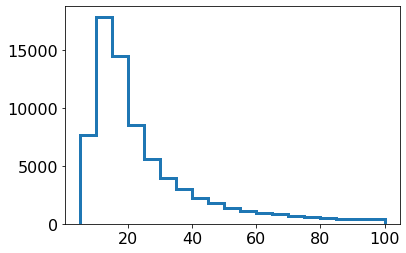

In [76]:
reco_energy_bins = np.linspace(5,100,20)
reco_costh_bins = np.linspace(-1,1,20)

_ = plt.hist(input_data["reco_energy"], 
         weights = rate_weight,
         bins = reco_energy_bins,
         histtype="step"
        )

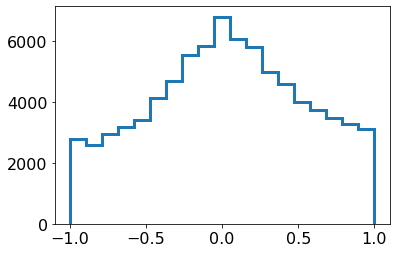

In [80]:
_ = plt.hist(np.cos(input_data["reco_zenith"]), 
         weights = rate_weight,
         bins = reco_costh_bins,
         histtype="step"
        )

# Plotting Oscillated Flux 

In [24]:
erange = nsq_atm.GetERange()
neutype = 1
phi_e = [nsq_atm.EvalFlavor(0,-1.0,EE,neutype) for EE in erange]
phi_mu = [nsq_atm.EvalFlavor(1,-1.0,EE,neutype) for EE in erange]
phi_tau = [nsq_atm.EvalFlavor(2,-1.0,EE,neutype) for EE in erange]

(1e+21, 1e+26)

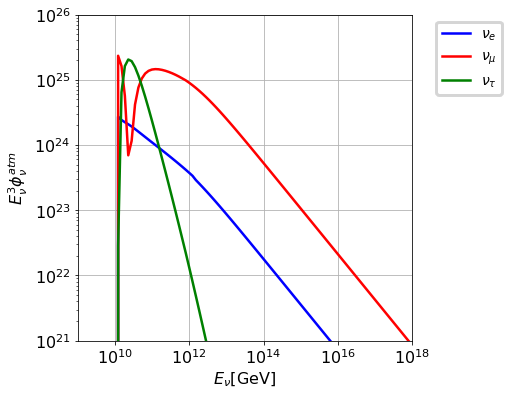

In [72]:
plt.figure(figsize = (6,6))

plt.plot(erange,phi_e*erange**3, lw = 2.5, color = "blue", label = r"$\nu_e$")
plt.plot(erange,phi_mu*erange**3, lw = 2.5, color = "red", label = r"$\nu_\mu$")
plt.plot(erange,phi_tau*erange**3, lw = 2.5, color = "green", label = r"$\nu_\tau$")

plt.loglog()

plt.xlim(erange[0],erange[-1])
plt.xlabel(r"$E_\nu [{\rm GeV}]$")
plt.ylabel(r"$E^3_\nu \phi^{atm}_\nu $")

plt.grid()

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, fontsize = 14, fancybox = True)
plt.ylim(1e21,1e26)